<a href="https://colab.research.google.com/github/Amisha1019/assignment/blob/main/text_to_image_generation_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch diffusers matplotlib transformers accelerate

In [ ]:
import torch

In [ ]:
x = torch.tensor([1.0, 2.0,3.0])
y = torch.ones(3)
z = x + y
print(z)

tensor([2., 3., 4.])


In [ ]:
print(x.shape, x.size(), x.dtype)

torch.Size([3]) torch.Size([3]) torch.float32


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

x = x.to(device)

In [ ]:
x = torch.tensor(3.0, requires_grad=True)
y = x ** 2
y.backward()
print(x.grad)

tensor(6.)


**Defining Neural network and optimizing**

In [ ]:
import torch.nn as nn
class SimpleModel(nn.Module):
  def __init__(self):
    super(SimpleModel, self).__init__()
    self.linear = nn.Linear(2,1)

  def forward(self, x):
    return self.linear(x)

In [ ]:
model = SimpleModel()
criteron = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

**Training the epoch**

In [ ]:
for epoch in range(10):
  optimizer.zero_grad()

  output = model(torch.tensor([[1.0, 2.0]]))
  loss = criteron(output, torch.tensor([[1.0]]))
  loss.backward()
  optimizer.step()
  print(f"Epoch {epoch}, Loss: {loss.item()}")

Epoch 0, Loss: 4.424086093902588
Epoch 1, Loss: 3.4260122776031494
Epoch 2, Loss: 2.653104066848755
Epoch 3, Loss: 2.0545639991760254
Epoch 4, Loss: 1.591054081916809
Epoch 5, Loss: 1.2321125268936157
Epoch 6, Loss: 0.9541476964950562
Epoch 7, Loss: 0.7388919591903687
Epoch 8, Loss: 0.5721979141235352
Epoch 9, Loss: 0.44311007857322693


**Dataset and data Loader**

In [ ]:
from torch.utils.data import DataLoader, TensorDataset

data = torch.tensor([[1.0,2.0], [3.0,4.0]])

targets = torch.tensor([[1.0], [0.0]])

dataset = TensorDataset(data, targets)

loader = DataLoader(dataset, batch_size = 1, shuffle = True)

for batch in loader:
  print(batch)

[tensor([[1., 2.]]), tensor([[1.]])]
[tensor([[3., 4.]]), tensor([[0.]])]


**Debugging with Torch Scrip **

In [ ]:
scripted_model =  torch.jit.script(model)

print(scripted_model)

scripted_model.save("scripted_model.pt")
loaded_model = torch.jit.load("scripted_model.pt")

print(loaded_model)

RecursiveScriptModule(
  original_name=SimpleModel
  (linear): RecursiveScriptModule(original_name=Linear)
)
RecursiveScriptModule(
  original_name=SimpleModel
  (linear): RecursiveScriptModule(original_name=Linear)
)


In [ ]:
pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt

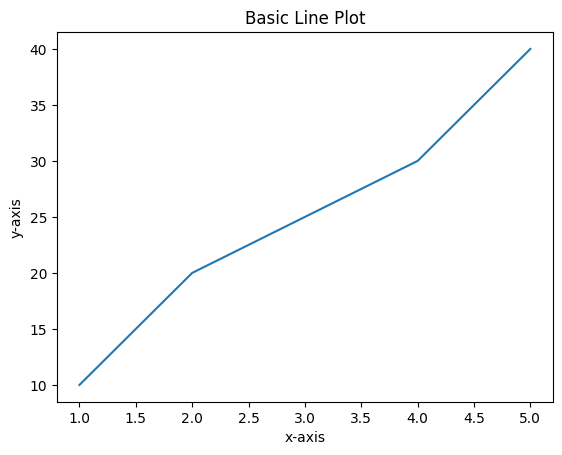

In [ ]:
x = [1,2,3,4,5]
y = [10,20,25,30,40]
plt.plot(x,y)
plt.title('Basic Line Plot')
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()

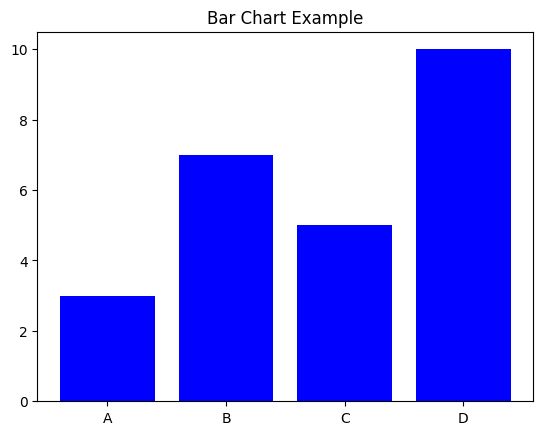

In [ ]:
categories = ['A',  'B', 'C', 'D']

values = [3,7,5,10]

plt.bar(categories, values, color='blue')
plt.title("Bar Chart Example")
plt.show()

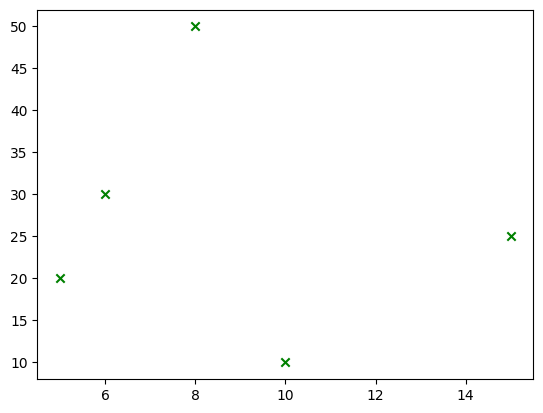

In [ ]:
x = [5,6,8,10,15]
y = [20,30,50,10,25]

plt.scatter(x,y,color = "green", marker = 'x')
plt.show()

**CUSTOMIZED LAYOUT AND AXE**S



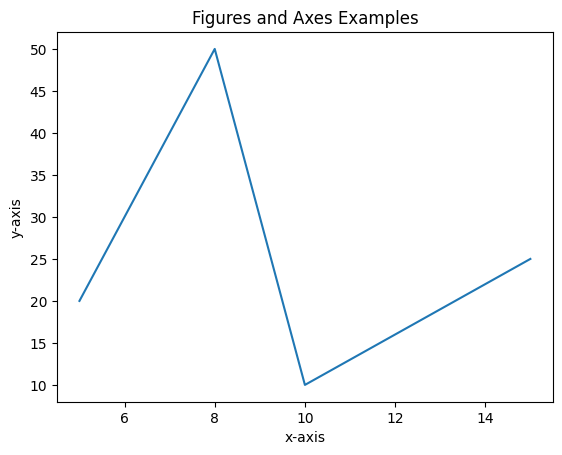

In [ ]:
fig, ax = plt.subplots()
ax.plot(x,y)
ax.set_title("Figures and Axes Examples")
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
plt.show()

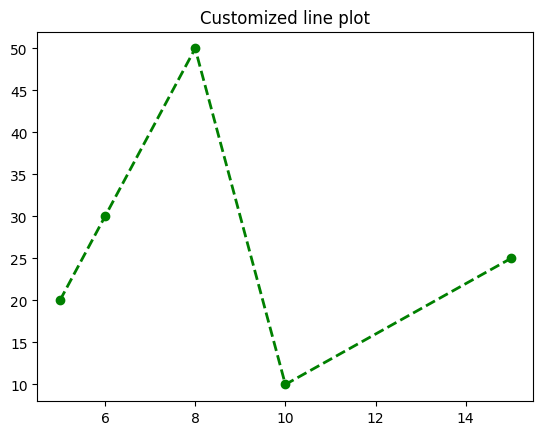

In [ ]:
plt.plot(x,y,color="green",linestyle="--", marker = 'o', linewidth=2)
plt.title("Customized line plot")
plt.show()

In [ ]:
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt

In [ ]:
authorization_token = ""
modelid = "CompVis/stable-diffusion-v1-4"
device = "cuda"

In [ ]:
pipe = StableDiffusionPipeline.from_pretrained(modelid, revision = "fp16", torch_dtype = torch.float16)
pipe.to("cpu") # Changed device to cpu

In [ ]:
with autocast(device):
  textprompt = str(input("Enter your prompt: "))

  image = pipe(textprompt, guidance_scale=8.5).images[0]

  imgplot = plt.imshow(image)

/usr/local/lib/python3.12/dist-packages/torch/amp/autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/diffusers/configuration_utils.py:141: FutureWarning: Accessing config attribute `__iter__` directly via 'StableDiffusionPipeline' object attribute is deprecated. Please access '__iter__' over 'StableDiffusionPipeline's config object instead, e.g. 'scheduler.config.__iter__'.
  deprecate("direct config name access", "1.0.0", deprecation_message, standard_warn=False)
